<a href="https://colab.research.google.com/github/ChenyuDu/firstRProject/blob/main/test_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import os
import numpy as np

# 定义模糊参数的列表
blur_lengths = [0, 5, 10, 15, 20, 25]

# 定义输入和输出文件夹路径
input_folder = 'motion-blurred'
output_folder = 'motion-blurred-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的模糊参数
        for blur_length in blur_lengths:
            if blur_length > 0:
                # 创建运动模糊核
                kernel = np.zeros((blur_length, blur_length))
                kernel[int((blur_length-1)/2), :] = np.ones(blur_length)
                kernel /= blur_length

                # 应用运动模糊
                img_blurred = cv2.filter2D(img, -1, kernel)

                # 保存模糊图像到输出文件夹
                output_filename = f'{filename}_blur_{blur_length}.jpg'
                output_path = os.path.join(output_folder, output_filename)
                cv2.imwrite(output_path, img_blurred)

            else:
                # 如果参数为0，直接复制原图像
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, img)

print('运动模糊完成！')


运动模糊完成！


In [10]:
import cv2
import os
import numpy as np

# 定义鱼眼参数的列表
fisheye_params = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

# 定义输入和输出文件夹路径
input_folder = 'fisheye'
output_folder = 'fisheye-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的鱼眼参数
        for fisheye_param in fisheye_params:
            if fisheye_param > 0:
                # 计算鱼眼变换参数
                height, width = img.shape[:2]
                K = np.array([[width, 0, width / 2], [0, height, height / 2], [0, 0, 1]], dtype=np.float32)
                D = np.array([fisheye_param, 0, 0, 0], dtype=np.float32)

                # 应用鱼眼变换
                undistorted_img = cv2.fisheye.undistortImage(img, K, D)

                # 保存鱼眼效果图像到输出文件夹
                output_filename = f'{filename}_fisheye_{fisheye_param}.jpg'
                output_path = os.path.join(output_folder, output_filename)
                cv2.imwrite(output_path, undistorted_img)

            else:
                # 如果参数为0，直接复制原图像
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, img)

print('鱼眼效果处理完成！')


鱼眼效果处理完成！


<ipython-input-14-fb32993cbfc6>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R = np.int(cols / 2 / math.pi)
<ipython-input-14-fb32993cbfc6>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more

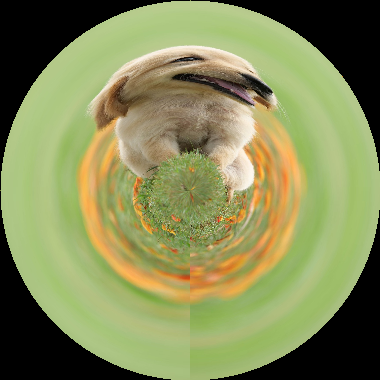

True

In [14]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow  # 导入 cv2_imshow 函数

def transform(img):
    rows, cols, c = img.shape
    R = np.int(cols / 2 / math.pi)
    D = R * 2
    cx = R
    cy = R

    new_img = np.zeros((D, D, c), dtype=np.uint8)

    for i in range(D):
        for j in range(D):
            r = math.sqrt((i - cx) ** 2 + (j - cy) ** 2)
            if r > R:
                continue
            tan_inv = np.arctan((j - cy) / (i - cx + 1e-10))
            if (i < cx):
                theta = math.pi / 2 + tan_inv
            else:
                theta = math.pi * 3 / 2 + tan_inv
            xp = np.int(np.floor(theta / 2 / math.pi * cols))
            yp = np.int(np.floor(r / R * rows))
            new_img[j, i] = img[rows - yp - 1, xp]

    return new_img

img = cv2.imread('fisheye/dog.jpg')
img = transform(img)
cv2_imshow(img)  # 使用 cv2_imshow() 来显示图像
cv2.waitKey(0)
cv2.imwrite('result.jpg', img)


<ipython-input-15-ee8d92826a2b>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R = np.int(cols / 2 / math.pi)
<ipython-input-15-ee8d92826a2b>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more

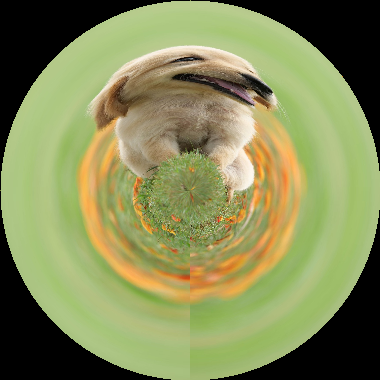

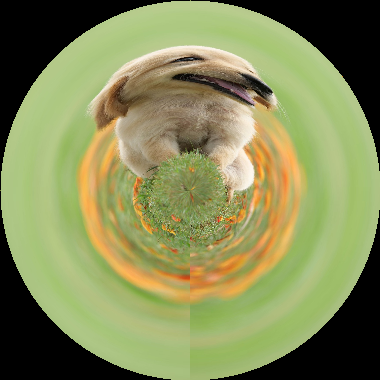

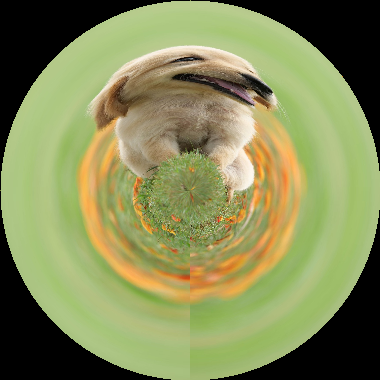

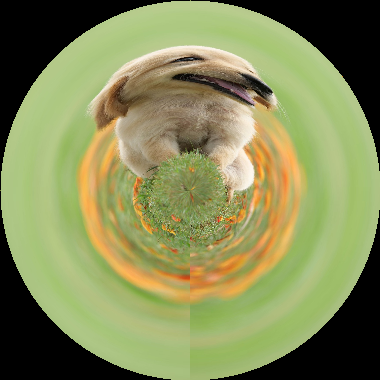

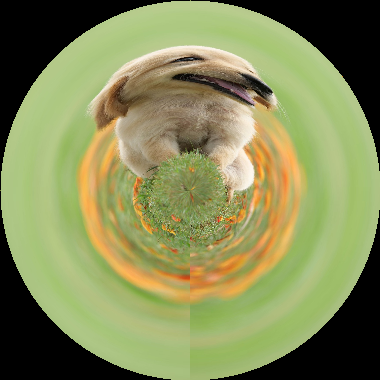

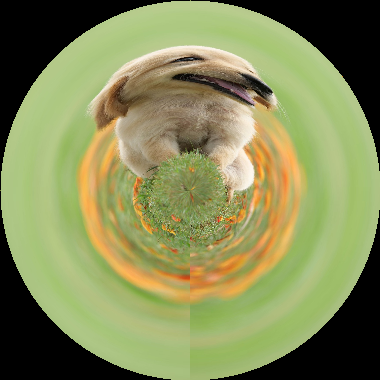

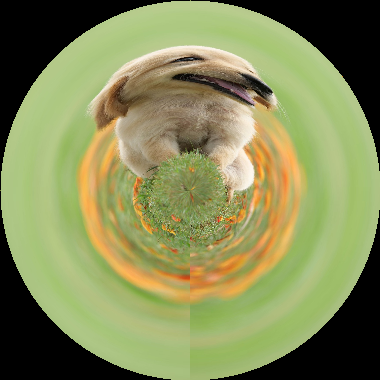

鱼眼效果处理完成！


In [15]:
import cv2
import os
import numpy as np
import math
from google.colab.patches import cv2_imshow

def transform(img, distortion_param):
    rows, cols, c = img.shape
    R = np.int(cols / 2 / math.pi)
    D = R * 2
    cx = R
    cy = R

    new_img = np.zeros((D, D, c), dtype=np.uint8)

    for i in range(D):
        for j in range(D):
            r = math.sqrt((i - cx) ** 2 + (j - cy) ** 2)
            if r > R:
                continue
            tan_inv = np.arctan((j - cy) / (i - cx + 1e-10))
            if (i < cx):
                theta = math.pi / 2 + tan_inv
            else:
                theta = math.pi * 3 / 2 + tan_inv
            xp = np.int(np.floor(theta / 2 / math.pi * cols))
            yp = np.int(np.floor(r / R * rows))
            new_img[j, i] = img[rows - yp - 1, xp]

    return new_img

# 定义鱼眼参数的列表
fisheye_params = [0, 1, 1.25, 1.5, 2, 2.25, 2.5]

# 定义输入和输出文件夹路径
input_folder = 'fisheye'
output_folder = 'fisheye-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的鱼眼参数
        for fisheye_param in fisheye_params:
            if fisheye_param >= 0:
                transformed_img = transform(img, fisheye_param)

                # 生成输出文件名
                output_filename = f'{filename}_distortion_{fisheye_param}.jpg'
                output_path = os.path.join(output_folder, output_filename)

                # 保存变换后的图像
                cv2.imwrite(output_path, transformed_img)

                # 显示图像（可选）
                cv2_imshow(transformed_img)

print('鱼眼效果处理完成！')


In [19]:
import cv2
import os

# 定义参数(τ, ω)的列表
# parameters = [(0, 0), (8, 0.6), (9, 0.7), (10, 0.8), (11, 0.9), (12, 1)]
parameters = [(0, 0), (50, 0.2), (70, 0.3), (90, 0.4), (110, 0.5), (130, 0.6)]

# 定义输入和输出文件夹路径
input_folder = 'lighting'
output_folder = 'lighting-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的参数
        for tau, omega in parameters:
            if tau == 0 and omega == 0:
                # 如果参数为(0, 0)，图片不变
                output_img = img
            else:
                # 计算光线变暗的效果
                output_img = cv2.convertScaleAbs(img, alpha=omega, beta=tau)

            # 生成输出文件名
            output_filename = f'{filename}_tau_{tau}_omega_{omega}.jpg'
            output_path = os.path.join(output_folder, output_filename)

            # 保存变换后的图像
            cv2.imwrite(output_path, output_img)

print('光线变暗处理完成！')


光线变暗处理完成！


In [22]:
import cv2
import os

# 定义参数f的列表
f_values = [0, 4, 8, 12, 16, 20]

# 定义输入和输出文件夹路径
input_folder = 'low-resolution'
output_folder = 'low-resolution-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的参数f
        for f in f_values:
            if f == 0:
                # 如果参数f为0，图像不变
                output_img = img
            else:
                # 计算新的图像分辨率
                new_width = img.shape[1] // f
                new_height = img.shape[0] // f

                # 使用图像缩放来降低分辨率
                output_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

                # 将低分辨率图像调整回原始大小
                output_img = cv2.resize(output_img, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_LINEAR)

            # 生成输出文件名
            output_filename = f'{filename}_f_{f}.jpg'
            output_path = os.path.join(output_folder, output_filename)

            # 保存降低分辨率后的图像
            cv2.imwrite(output_path, output_img)

print('低分辨率图像处理完成，并调整为原始大小！')


低分辨率图像处理完成，并调整为原始大小！


In [23]:
import cv2
import os
import numpy as np

# 定义参数s的列表
s_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

# 定义输入和输出文件夹路径
input_folder = 'Salt-and-pepper noise'
output_folder = 'Salt-and-pepper noise-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的参数s
        for s in s_values:
            if s == 0:
                # 如果参数s为0，图像不变
                output_img = img
            else:
                # 生成与图像大小相同的随机噪声
                noise = np.random.rand(*img.shape) * 255

                # 将噪声添加到图像中
                noisy_img = np.copy(img)
                noisy_img[noise < s * 128] = 0  # 添加黑色噪声
                noisy_img[noise > 255 - s * 128] = 255  # 添加白色噪声

                output_img = noisy_img

            # 生成输出文件名
            output_filename = f'{filename}_s_{s}.jpg'
            output_path = os.path.join(output_folder, output_filename)

            # 保存添加噪声后的图像
            cv2.imwrite(output_path, output_img)

print('椒盐噪声图像处理完成！')


椒盐噪声图像处理完成！


In [24]:
import cv2
import os
import numpy as np

# 定义参数v的列表
v_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

# 定义输入和输出文件夹路径
input_folder = 'Gaussian white noise'
output_folder = 'Gaussian white noise-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的参数v
        for v in v_values:
            if v == 0:
                # 如果参数v为0，图像不变
                output_img = img
            else:
                # 生成与图像大小相同的高斯噪声
                noise = np.random.normal(0, v * 255, img.shape).astype(np.uint8)

                # 将噪声添加到图像中
                noisy_img = cv2.add(img, noise)

                output_img = noisy_img

            # 生成输出文件名
            output_filename = f'{filename}_v_{v}.jpg'
            output_path = os.path.join(output_folder, output_filename)

            # 保存添加噪声后的图像
            cv2.imwrite(output_path, output_img)

print('高斯白噪声图像处理完成！')


高斯白噪声图像处理完成！


In [25]:
import cv2
import os

# 定义参数g的列表
g_values = [0, 1, 2, 3, 4, 5]

# 定义输入和输出文件夹路径
input_folder = 'Gaussian-blurred'
output_folder = 'Gaussian-blurred-output'

# 创建输出文件夹
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# 遍历输入文件夹中的图像文件
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        img = cv2.imread(input_path)

        # 遍历不同的参数g
        for g in g_values:
            if g == 0:
                # 如果参数g为0，图像不变
                output_img = img
            else:
                # 使用高斯模糊来模糊图像
                output_img = cv2.GaussianBlur(img, (2 * g + 1, 2 * g + 1), 0)

            # 生成输出文件名
            output_filename = f'{filename}_g_{g}.jpg'
            output_path = os.path.join(output_folder, output_filename)

            # 保存模糊后的图像
            cv2.imwrite(output_path, output_img)

print('高斯模糊图像处理完成！')


高斯模糊图像处理完成！
